<a href="https://colab.research.google.com/github/TonnBH/APPML_Projects/blob/main/enefit_prever_o_comportamento_energ_tico_dos_prosumidores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Definições

- Prossumidor: Termo usado para descrever pessoas que produzem e consomem o próprio produto ou serviço.
- Fotovoltaico: Energia solar obtida através da conversão direta da luz em eletricidade.

## Definição do tema:

Prever o Comportamento Energético dos Prosumidores.

Link: https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers/overview

## Descrição do Projeto:

Resolver os problemas do desequilíbrio energético e dos seus custos crescentes, instabilidade da rede e à utilização ineficiente dos recursos energéticos. Reduzir significativamente os custos de desequilíbrio, melhorar a confiabilidade da rede e tornar a integração dos prosumidores no sistema energético mais eficiente e sustentável. Incentivar mais consumidores a tornarem-se prosumidores. Promovendo a produção e utilização de energias renováveis.

### Importar Bibliotecas Usadas no Projeto

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [ ]:
from google.colab import files

Este projeto será dividido em varias etapas para que possamos entender melhor o problema e encontrar a melhor resolução para o mesmo.

#### Primeira Etapa - Entender os clientes

In [ ]:
df_client = pd.read_csv('/content/drive/MyDrive/ML_Projects/Kaggle/Enefit /exemple_analysis_files/client.csv')

In [ ]:
df_client.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [ ]:
print('Variaveis:\t {}'.format(df_client.shape[0]))
print('Colunas:\t {}'.format(df_client.shape[1]))

Variaveis:	 41919
Colunas:	 7


### Conferindo Valores Nulos

In [ ]:
(df_client.isnull().sum() / df_client.shape[0]).sort_values(ascending=False)

product_type          0.0
county                0.0
eic_count             0.0
installed_capacity    0.0
is_business           0.0
date                  0.0
data_block_id         0.0
dtype: float64

## Descrição da tabela

- product_type: Tipos de Produtos.
- county: Código identificador do condado da região da Estônia.
- eic_count: O número agregado de pontos de consumo.
- installed_capacity: Capacidade instalada do painel solar fotovoltaico em quilowatts.
- is_business: Se é uma empresa ou não.
- date: Data.
- data_block_id: ID do bloco de dados.

## Alterando os tipos de Dados

Esta etapa foi criada para categorizar alguns dados, para que sejam melhor visualizados.

In [ ]:
df_client["county"] = df_client["county"].astype ('category')
df_client["product_type"] = df_client["product_type"].astype ('category')
df_client["is_business"] = df_client["is_business"].astype ('category')
df_client["data_block_id"] = df_client["data_block_id"].astype ('category')
df_client['date'] = pd.to_datetime(df_client['date'])

In [ ]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41919 entries, 0 to 41918
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_type        41919 non-null  category      
 1   county              41919 non-null  category      
 2   eic_count           41919 non-null  int64         
 3   installed_capacity  41919 non-null  float64       
 4   is_business         41919 non-null  category      
 5   date                41919 non-null  datetime64[ns]
 6   data_block_id       41919 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(1)
memory usage: 1.2 MB


## Códigos das Cidades Encontrados na tabela JSON

In [ ]:
name_county = {"0":"HARJUMAA",\
               "1":"HIIUMAA", \
               "2":"IDA-VIRUMAA",\
               "3":"RVAMAA",\
               "4":"GEVAMAA",\
               "5":"VIRUMAA",\
               "6":"NEMAA",\
               "7":"RNUMAA",\
               "8":"LVAMAA",\
               "9":"RAPLAMAA",\
               "10":"SAAREMAA",\
               "11":"TARTUMAA",\
               "12":"UNKNOWN",\
               "13":"VALGAMAA",\
               "14":"VILJANDIMAA",\
               "15":"V\u00d5RUMAA"}

In [ ]:
df_client.head()

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


array([[<Axes: title={'center': 'installed_capacity'}>]], dtype=object)

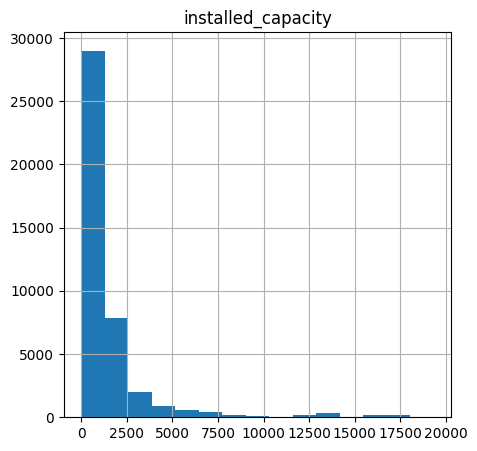

In [ ]:
df_client.hist('installed_capacity',bins=15, figsize=(5,5))

In [ ]:
df_client.describe()

,eic_count,installed_capacity
count,41919.000000,41919.000000
mean,73.345118,1450.771451
std,144.064389,2422.233120
min,5.000000,5.500000
25%,13.000000,321.900000
50%,32.000000,645.200000
75%,70.000000,1567.150000
max,1517.000000,19314.310000


In [ ]:
#Arredondando os números
df_client['installed_capacity'].round(2)

0         952.89
1         166.40
2        7207.88
3         400.00
4        1411.00
          ...   
41914     415.60
41915    2035.75
41916     620.00
41917     624.50
41918    2188.20
Name: installed_capacity, Length: 41919, dtype: float64

In [ ]:
df_client.head(15)

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2
5,3,0,265,13417.79,1,2021-09-01,2
6,1,1,7,80.00,0,2021-09-01,2
7,3,1,42,472.60,0,2021-09-01,2
8,3,1,12,295.50,1,2021-09-01,2
9,3,2,33,414.50,0,2021-09-01,2


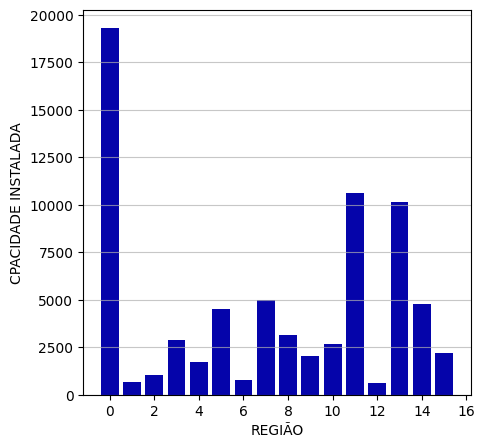

In [ ]:
plt.figure(figsize=(5,5))
plt.bar(df_client['county'], df_client['installed_capacity'], color='#0504aa')
plt.grid(axis='y', alpha=0.7)
plt.xlabel('REGIÃO')
plt.ylabel('CPACIDADE INSTALADA')
plt.show()

In [ ]:
# Soma do total da capacidade instalada por Região
df_client.groupby(['county']).installed_capacity.sum().sort_values(ascending=False)

county
0     19938156.04
11     9116437.84
7      5365092.26
14     4280490.32
5      4180651.95
10     3020374.89
15     2632276.52
3      2594573.28
4      2515149.40
9      1888624.73
8      1559090.56
13     1488986.52
2      1054216.14
1       642427.12
6       295818.90
12      242522.00
Name: installed_capacity, dtype: float64

In [ ]:
# Soma do total da quantidade de usuários por cidade (Ver dicionário linha 10)
df_client['county'].value_counts()

0     4422
11    4115
7     3596
5     3149
15    3089
4     3058
10    2797
14    2611
3     2544
9     2544
13    2514
2     2392
1     1908
8     1908
6      636
12     636
Name: county, dtype: int64

In [ ]:
#Soma do Total de capacidade instalada por Empresas e Residencias sendo que 1 = Empresas e 0 = Residencias
df_client.groupby(['is_business']).installed_capacity.sum().sort_values(ascending=False)

is_business
1    36198438.60
0    24616449.87
Name: installed_capacity, dtype: float64

In [ ]:
# Soma do total de empresas e residencias por cidade sendo que 1 = Empresas e 0 = Residencias
df_client.groupby(['county']).is_business.value_counts().sort_values(ascending=False)

county  is_business
0       1              2514
11      1              2255
0       0              1908
7       1              1908
5       1              1877
11      0              1860
15      1              1817
4       1              1786
7       0              1688
10      1              1525
14      1              1339
        0              1272
13      0              1272
10      0              1272
9       1              1272
        0              1272
8       0              1272
5       0              1272
4       0              1272
3       1              1272
        0              1272
1       0              1272
15      0              1272
13      1              1242
2       0              1242
        1              1150
8       1               636
6       1               636
12      1               636
1       1               636
6       0                 0
12      0                 0
Name: is_business, dtype: int64

In [ ]:
# Média por usuário e por cidade
df_client.groupby(['county']).installed_capacity.mean().sort_values(ascending=False).round(2)

county
0     4508.85
11    2215.42
14    1639.41
7     1491.96
5     1327.61
10    1079.86
3     1019.88
15     852.15
4      822.48
8      817.13
9      742.38
13     592.28
6      465.12
2      440.73
12     381.32
1      336.70
Name: installed_capacity, dtype: float64

Analisando as primeiras informações ja podemos ver que em determinas regiões a media de capacidade instalada("installed_capacity") por usuáio, é insuficiente. Como exemplo a região de "TARTUMAA" (codigo de identificação = 11), onde 4115 usuários para 9.116.437.84 kW,com uma média de 2215.42, sendo que 2255 são empresas. Em comparação temos a região de "VALGAMAA" (código de identificação = 13), onde a capacidade energica é de 1.488.986.52 KW, para 2514 usuários, com uma media de 592.28 por usuário, com 1242 empresas.

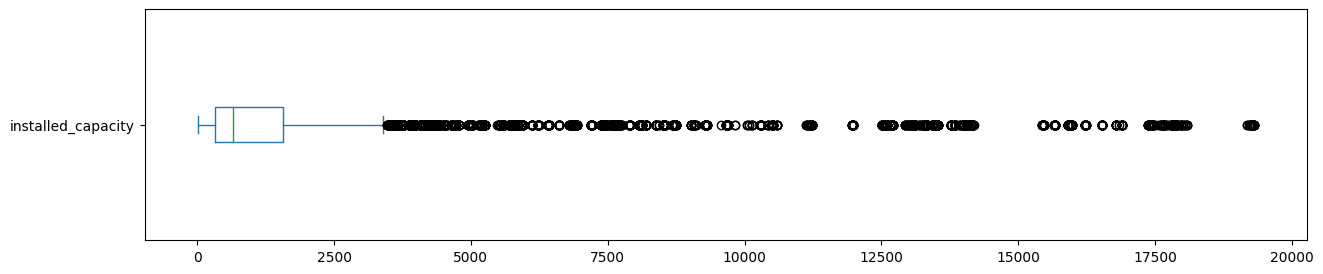

362 entradas


In [ ]:
df_client['installed_capacity'].plot(kind='box', vert=False,figsize=(15,3))
plt.show()

print('{} entradas'.format(len(df_client[df_client.installed_capacity > 15000])))